<a href="https://colab.research.google.com/github/NishanthReddy7/Machine-Learning/blob/main/Lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

# Load the dataset
data = pd.read_csv('tesla_yfinance_data.csv')

# Display the first few rows of the dataset
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


In [5]:
# Create a target column: 1 if Close > Open, otherwise 0
data['Target'] = (data['Close'] > data['Open']).astype(int)

# Define features (using 'Open', 'High', 'Low', 'Close', 'Volume') and the target
X = data[['Open', 'High', 'Low', 'Close', 'Volume']]
y = data['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((177, 5), (76, 5), (177,), (76,))

In [6]:
# Initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)
# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate using confusion matrix and classification metrics
conf_matrix = confusion_matrix(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Confusion Matrix:
 [[18 19]
 [17 22]]
Precision: 0.5257289565376857
Recall: 0.5263157894736842
F1-Score: 0.5256578947368421


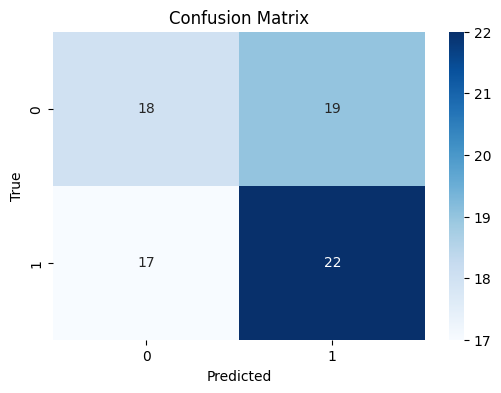

In [7]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [8]:
# Tune KNN with different values for k
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    print(f"K={k}: Precision={precision:.3f}, Recall={recall:.3f}, F1-Score={f1:.3f}")


K=1: Precision=0.632, Recall=0.632, F1-Score=0.632
K=3: Precision=0.526, Recall=0.526, F1-Score=0.526
K=5: Precision=0.568, Recall=0.566, F1-Score=0.565
K=7: Precision=0.488, Recall=0.487, F1-Score=0.486
K=9: Precision=0.514, Recall=0.513, F1-Score=0.513


In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Assume 'item_price' is the feature and 'transaction_amount' is the target column for regression
X_train = data[['Close']]
y_train = data['Open']

# Train linear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)

# Calculate metrics
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R2 Score:", r2)

MSE: 17.37519509782496
RMSE: 4.168356402447487
MAPE: 0.02993941529864187
R2 Score: 0.994415229300379


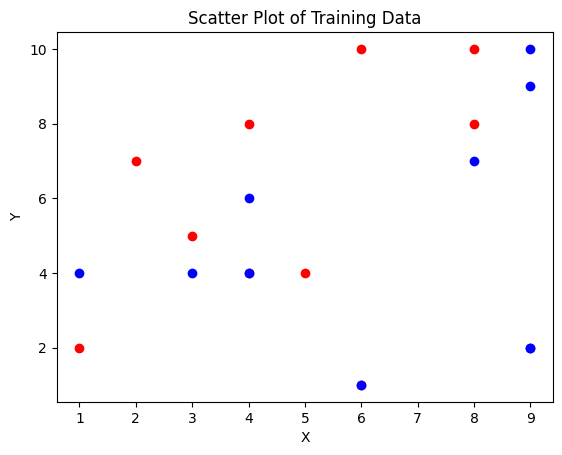

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 20 random data points
np.random.seed(0)
X_train = np.random.randint(1, 11, size=(20, 2))
y_train = np.random.choice([0, 1], size=20)

# Scatter plot
for i in range(len(y_train)):
    if y_train[i] == 0:
        plt.scatter(X_train[i, 0], X_train[i, 1], color='blue')
    else:
        plt.scatter(X_train[i, 0], X_train[i, 1], color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Training Data')
plt.show()